#### import

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **1. 了解資料**

#### 1.1 讀取資料集

In [2]:
# 讀取資料集train.csv
df = pd.read_csv('train.csv')
# 用head()查看前幾筆資料
print("head of data: ")
print(df.head())
print()

head of data: 
   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740      

In [3]:
# 查看資料的摘要統計
print("description of data: ")
print(df.describe())
print()

description of data: 
       profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean      0.701389              0.163837        1.460069   
std       0.458047              0.214096        1.052601   
min       0.000000              0.000000        0.000000   
25%       0.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.310000        2.000000   
max       1.000000              0.920000       12.000000   

       nums/length fullname  name==username  description length  external URL  \
count            576.000000      576.000000          576.000000    576.000000   
mean               0.036094        0.034722           22.623264      0.116319   
std                0.125121        0.183234           37.702987      0.320886   
min                0.000000        0.000000            0.000000      0.000000   
25%                0.000000     

In [4]:
# 查看每個欄位的數據類型和缺失值
print("info of data: ")
print(df.info())

info of data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
None


#### 1.2 視覺化特徵分布

In [5]:
sns.set(style="whitegrid")  # 設定圖表背景和網格線的風格

1.2.1 以箱形圖查看數值特徵的分佈

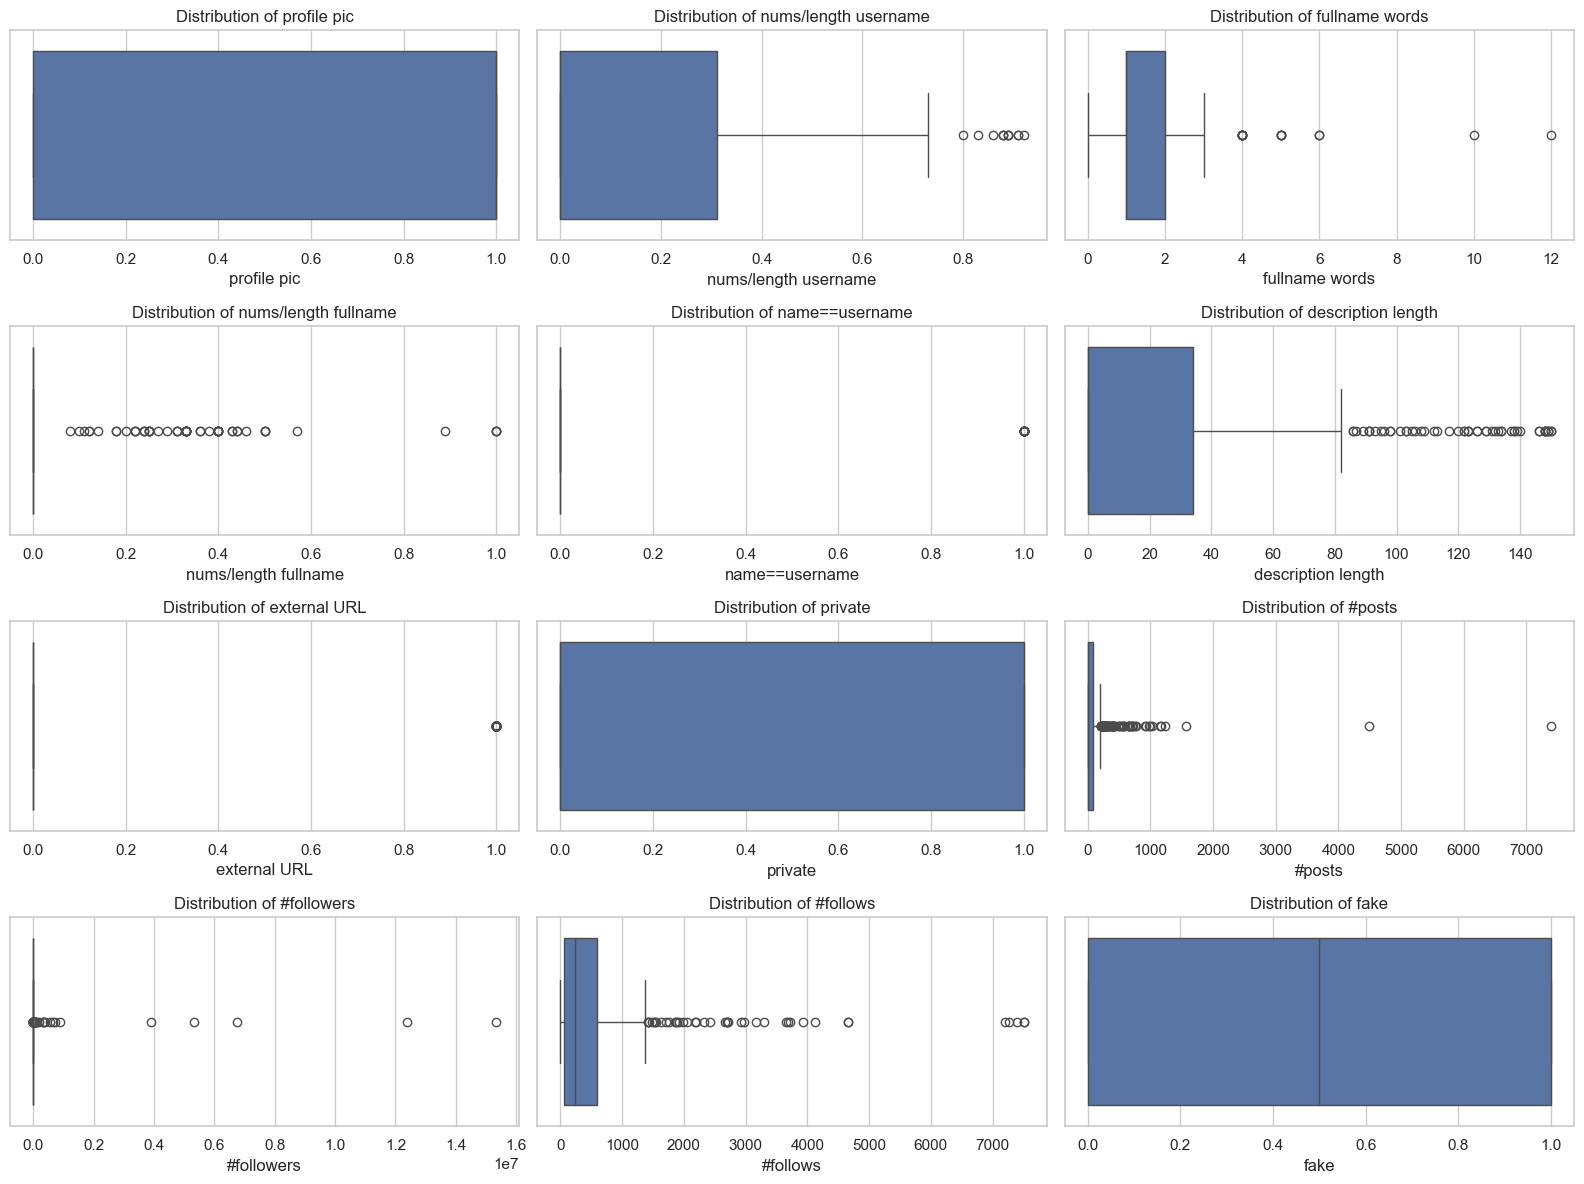

In [6]:
numeric_attributes = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(4, 3, figsize=(16, 12))
axes = axes.flatten()

for i, attribute in enumerate(numeric_attributes):
    sns.boxplot(x=attribute, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {attribute}')

plt.savefig('boxplot.png')
plt.tight_layout()
plt.show()
# store plt image

1.2.2 以直方圖查看連續特徵分布

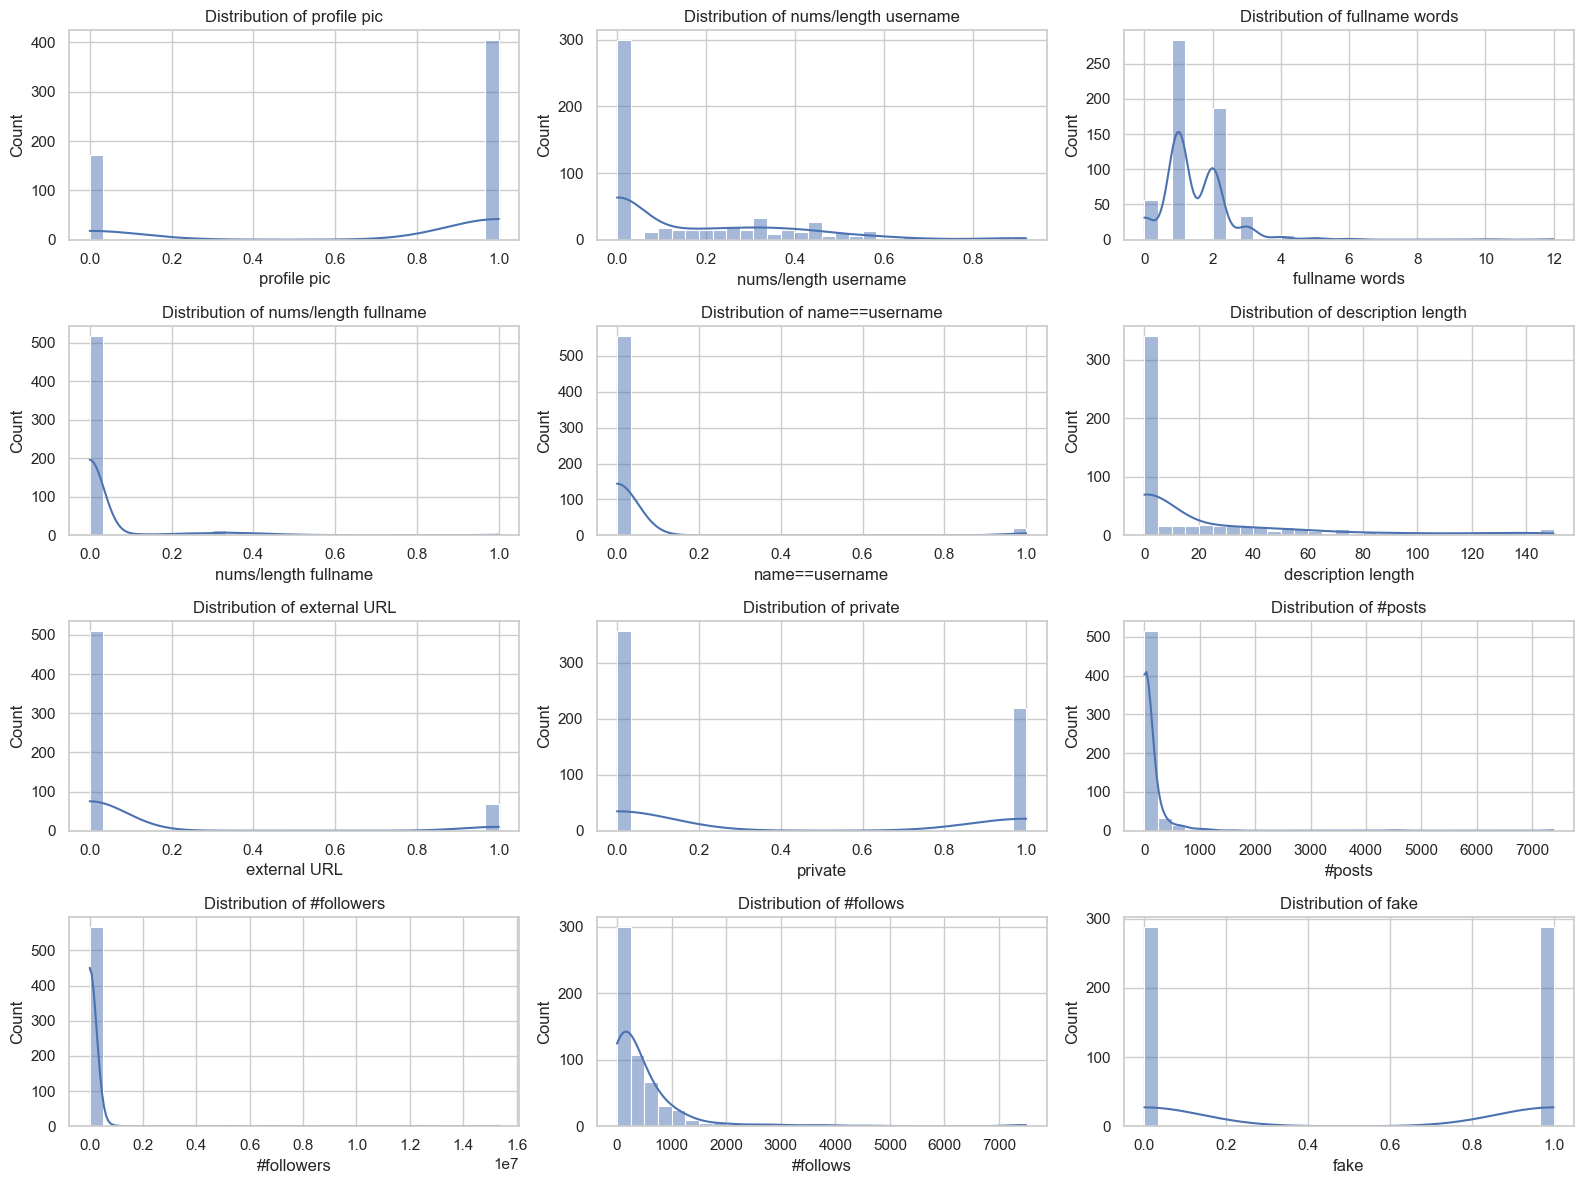

In [7]:
numeric_attributes = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
axes = axes.flatten()

for i, attribute in enumerate(numeric_attributes):
    sns.histplot(df[attribute], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {attribute}')

plt.savefig('histplot.png')
plt.tight_layout()
plt.show()

1.2.3 以計數圖查看離散特徵的分佈

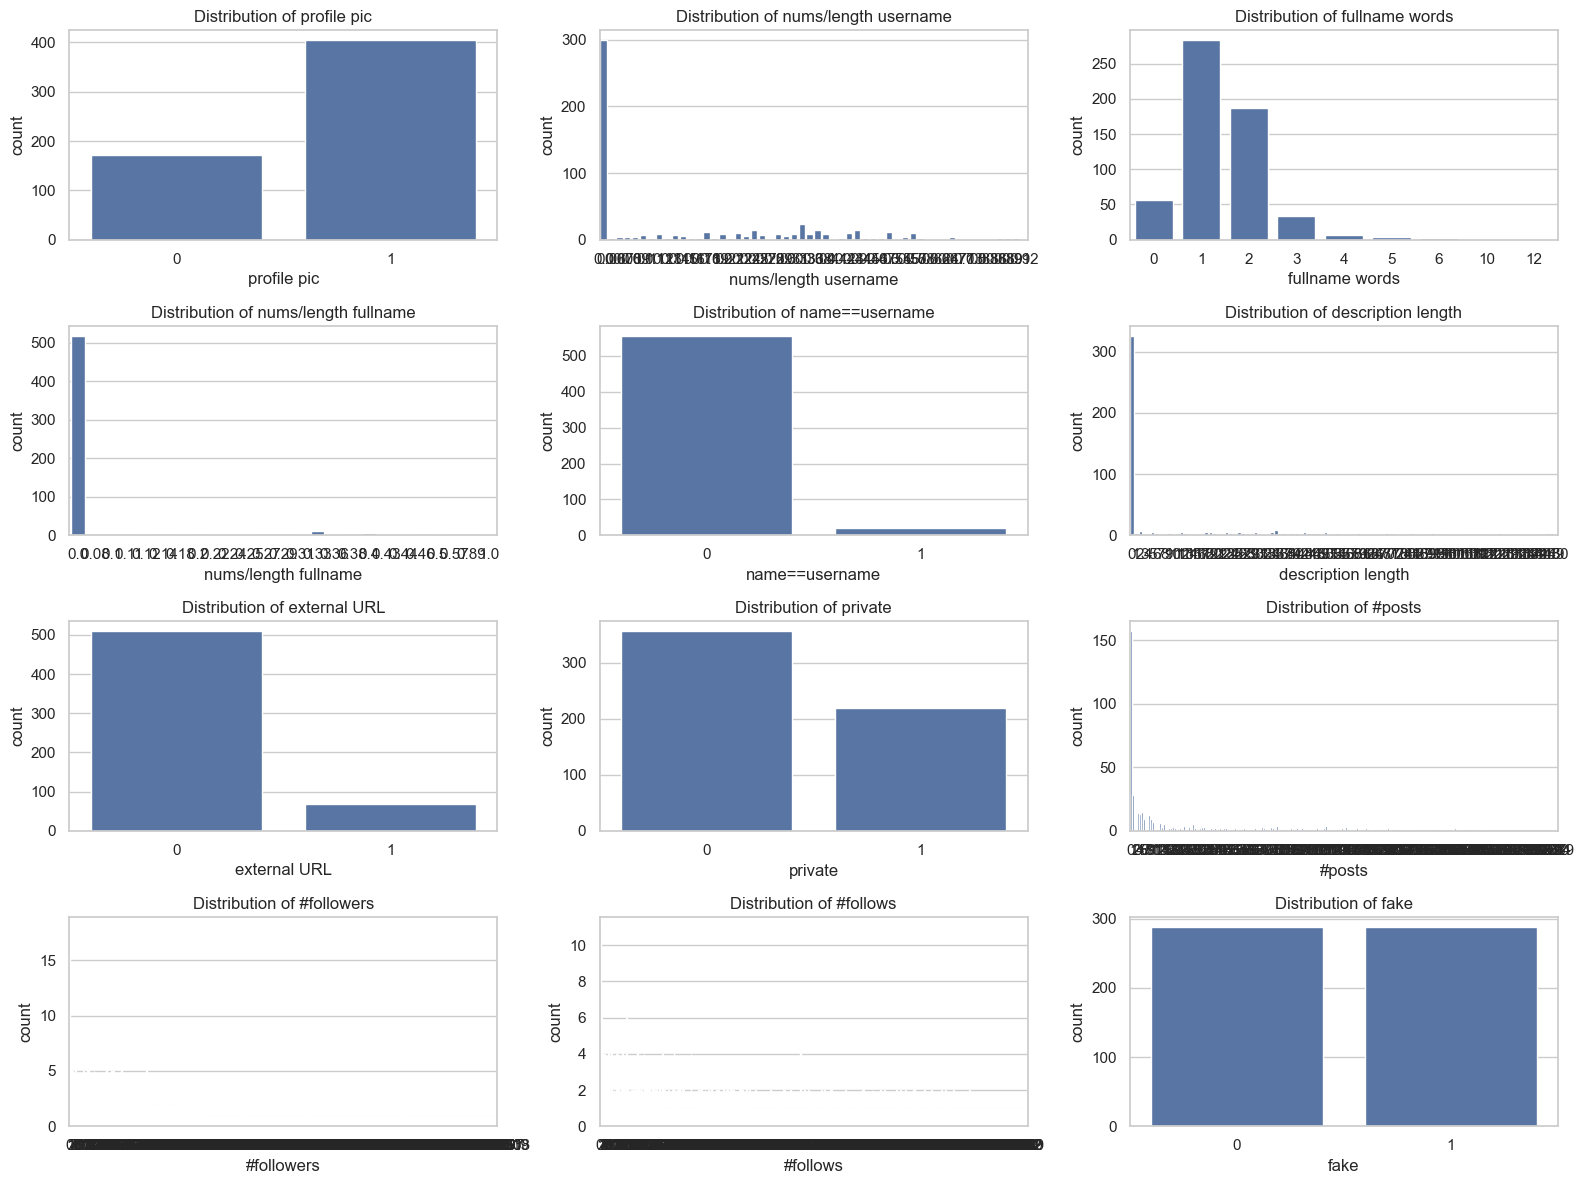

In [8]:
numeric_attributes = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
axes = axes.flatten()

for i, attribute in enumerate(numeric_attributes):
    sns.countplot(x=attribute, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {attribute}')

plt.savefig('countplot.png')
plt.tight_layout()
plt.show()

1.2.4 相關性矩陣

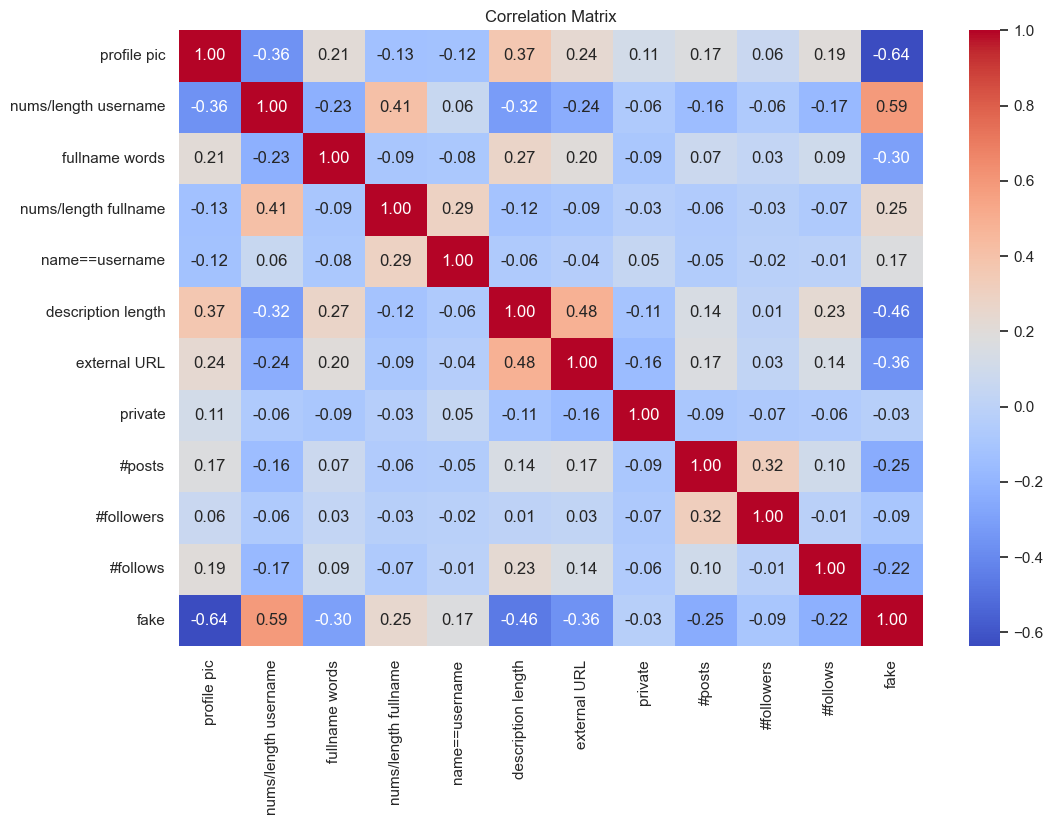

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')

### **2. 前處理**

⽬的 : 將資料處理成適合模型的輸⼊\
在上個步驟得到資料屬性後，可以根據特性做處理。
1. 發現資料有缺失 -> ⽤插值法補⿑或是刪除該筆資料
2. 當模型需要離散的資料 -> 連續型資料切分轉為離散型資料
3. ⽂字資訊轉為數字型態
4. oversampling /undersampling 
5. 補⿑正反資料 ...等等

#### 2.1 分割"類別class"、"特徵attributete" 

In [10]:
# 假設你的資料集為df，X是特徵，y是目標變數
X = df.drop('fake', axis=1)  # axis=1 代表欄
y = df['fake']
# 用head()查看前幾筆資料
print("X: ")
print(X.head())
print()
print("y: ")
print(y.head())

X: 
   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  
0        1000       955  
1        2740       533  
2         159   

### **3. 建立模型**

1. 將資料依據 8:2 分成 train 和 test sets(使⽤ `sklearn` 的 `train_test_split()` )
2. 建⽴ Decision tree 模型

#### 3.1 切割模型

`train_test_split(X, y, test_size=0.2, random_state=42)`

1. X: 特徵集合
2. y: 目標變數
3. test_size: 指定測試集的比例，這裡是 0.2，表示將 20% 的資料分配給測試集。
4. random_state: 是隨機種子，確保每次執行程式時，得到的分割結果都是一致的。

訓練模型使用 X_train 和 y_train\
測試模型使用 X_test 和 y_test\
這有助於確保模型的泛化性能，也就是對未見過的數據的預測能力

In [11]:
# 使用 train_test_split 分割資料
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42)
print("shape of X: ", X.shape)
print("shape of y: ", y.shape)
print("shape of train_data: ", train_data.shape)
print("shape of test_data: ", test_data.shape)
print("shape of train_labels: ", train_labels.shape)
print("shape of test_labels: ", test_labels.shape)

shape of X:  (576, 11)
shape of y:  (576,)
shape of train_data:  (460, 11)
shape of test_data:  (116, 11)
shape of train_labels:  (460,)
shape of test_labels:  (116,)


#### 3.2 Class DecisionTree

In [12]:

class Node:
    def __init__(self, attribute=None, threshold=None, value=None, left=None, right=None):
        """
        初始化節點
        :param attribute: 分割特徵的索引
        :param threshold: 分割的閾值
        :param value: 節點的值（類別）
        :param left: 左子树
        :param right: 右子树
        """
        self.attribute = attribute
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right


class DecisionTree:
    """
    Decision Tree class
    """

    def __init__(self, min_samples_split=None, max_depth=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, examples, attributes, parent_examples=None):
        """Build the decision tree."""

        self.tree = self._decision_tree_learning(
            examples=examples, attributes=attributes, parent_examples=parent_examples)

    def _entropy(self, y):  # ok
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)  # 計算每個類別的機率
        # 利用講義公式計算entropy
        entropy = -np.sum(probabilities * np.log2(probabilities))

        return entropy

    def _importance(self, attributes, examples):  # ok
        """Calculate attribute importance."""
        # attribute: 還沒有被安排的屬性長度
        # examples: 整個資料集的長度
        print("讀入important的examples長度: ", examples.shape)
        min_entropy = float('inf')
        best_attribute, best_threshold = None, None
        for attribute in attributes:
            if attribute == 11:  # 最後一個屬性是label，不用計算
                break

            thresholds = np.unique(examples[:, attribute])
            for threshold in thresholds:  # 對每個閾值計算entropy，找出擁有最小entropy的閾值
                left_indices = examples[:, attribute] <= threshold
                right_indices = ~left_indices

                left_entropy = self._entropy(examples[left_indices, -1])
                right_entropy = self._entropy(examples[right_indices, -1])

                entropy = (len(examples[left_indices, -1]) * left_entropy +
                           len(examples[right_indices, -1]) * right_entropy) / 460

                # importance function
                if entropy < min_entropy:
                    min_entropy = entropy
                    best_attribute = attribute
                    best_threshold = threshold
        return best_attribute, best_threshold

    def _decision_tree_learning(self, examples, attributes, parent_examples=None, depth=0):
        """
        Recursive decision tree learning.
        """
        if self.max_depth is not None and depth == self.max_depth or all(examples[:, -1] == examples[0, -1]):
            # 改變樹高 -> 如果樹的深度等於max_depth，則停止分割
            print("interrupt 達到最大深度")
            classification = np.argmax(np.bincount(examples[:, -1].astype(int)))
            if classification == 0:
                print("Fake")
            else:
                print("True")
            return Node(value=np.argmax(np.bincount(examples[:, -1].astype(int))))
        if self.min_samples_split is not None and len(examples) < self.min_samples_split:
            # 剪枝 -> 如果樣本數小於min_samples_split，則停止分割
            print("interrupt 達到最小樣本數")
            classification = np.argmax(np.bincount(examples[:, -1].astype(int)))
            if classification == 0:
                print("Fake")
            else:
                print("True")
            return Node(value=np.argmax(np.bincount(examples[:, -1].astype(int))))

        best_attribute, best_threshold = self._importance(attributes, examples)
        print("best attribute", best_attribute)
        print("best threshold", best_threshold)

        if attribute is None:
            print("interrupt 找不到最佳分割點")
            return Node(value=max(set(y), key=list(y).count))

        # 同一attribute
        # 每個不同的值都會生成一個分支，代表了該屬性的一種可能取值
        # 但資料類型為數值型時，會根據threshold將資料分成兩類
        left_indices = examples[:, best_attribute] <= best_threshold
        print("length of left 資料量", len(examples[left_indices]))
        print("length of right 資料量", len(examples[~left_indices]))

        right_indices = ~left_indices
        print("進入左子樹")
        left_subtree = self._decision_tree_learning(
            examples=examples[left_indices], depth=depth + 1, attributes=attributes, parent_examples=examples)
        print("進入右子樹")
        right_subtree = self._decision_tree_learning(
            examples=examples[right_indices], depth=depth + 1, attributes=attributes, parent_examples=examples)

        return Node(attribute=best_attribute, threshold=best_threshold, left=left_subtree, right=right_subtree)

    def accuracy(self, y_true, y_pred):
        """
        計算準確率
        :param y_true: 真實值
        :param y_pred: 預測值
        :return: 準確率
        """

        return np.sum(y_true == y_pred) / len(y_true)

    def predict_sample(self, tree, sample):
        """
        預測單個樣本
        :param tree: 決策樹
        :param sample: 單個樣本
        :return: 預測結果
        """
        if tree.value is not None:
            return tree.value

        if sample[tree.attribute] <= tree.threshold:
            return self.predict_sample(tree.left, sample)
        else:
            return self.predict_sample(tree.right, sample)

    def predict(self, X):
        """
        預測多個樣本
        :param X: 特徵變量
        :return: 預測結果
        """
        return np.array([self.predict_sample(self.tree, sample) for sample in X])

#### 3.3 進行Predict

In [13]:
# 屬性名稱
attributes = list(range(train_data.shape[1]+1))

print("attributes: ", attributes)
# 建立 Decision Tree 模型
dt = DecisionTree(max_depth=6, min_samples_split=5)
# 訓練模型
examples = np.concatenate(
    (train_data.values, train_labels.values.reshape(-1, 1)), axis=1)
print("某一個 examples: ", examples[0])

##### Start to train#####
print("=====Start to train=====")
dt.fit(examples=examples, attributes=attributes)


##### Start to test#####
print("=====Start to test=====")
y_pred = dt.predict(test_data.values)
print('Test Accuracy:', dt.accuracy(test_labels.values, y_pred))

attributes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
某一個 examples:  [ 0.   0.4  1.   0.   0.   0.   0.   1.   0.  24.  88.   1. ]
=====Start to train=====
讀入important的examples長度:  (460, 12)
best attribute 9
best threshold 97.0
length of left 資料量 206
length of right 資料量 254
進入左子樹
讀入important的examples長度:  (206, 12)
best attribute 1
best threshold 0.19
length of left 資料量 75
length of right 資料量 131
進入左子樹
讀入important的examples長度:  (75, 12)
best attribute 9
best threshold 57.0
length of left 資料量 61
length of right 資料量 14
進入左子樹
讀入important的examples長度:  (61, 12)
best attribute 0
best threshold 0.0
length of left 資料量 40
length of right 資料量 21
進入左子樹
interrupt 達到最大深度
True
進入右子樹
讀入important的examples長度:  (21, 12)
best attribute 2
best threshold 1.0
length of left 資料量 16
length of right 資料量 5
進入左子樹
讀入important的examples長度:  (16, 12)
best attribute 8
best threshold 3.0
length of left 資料量 13
length of right 資料量 3
進入左子樹
interrupt 達到最大深度
True
進入右子樹
interrupt 達到最大深度
True
進入右子樹
讀入important的examples長度:  (5, 1

#### 3.4 印出決策樹

In [14]:
# 將Attribute轉成對應的名稱
attributes_name = list(df.columns)
attributes_name.remove('fake')
print("attributes_name: ", attributes_name)
# 輸入Attribute的代號
print("輸入Attribute的代號: ")
print("0: ", attributes_name[1])

attributes_name:  ['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'description length', 'external URL', 'private', '#posts', '#followers', '#follows']
輸入Attribute的代號: 
0:  nums/length username


In [17]:
def _print_tree(tree):
    """
    印出決策樹
    :param model.tree: 決策樹
    """
    def print_node(tree, depth=0, root=0):
        if tree.value is not None:
            print("第", depth, "層(末端)================================================")
            print("Fake or True:", tree.value)
        else:
            if (root == 1):
                print("第", depth, "層(左)================================================")
                print(attributes_name[tree.attribute],
                      "|| threshold", tree.threshold)
            elif (root == 2):
                print("第", depth, "層(右)================================================")
                print(attributes_name[tree.attribute],
                      "|| threshold", tree.threshold)
            elif (root == 0):
                print("樹頂==========================================================")
                print(attributes_name[tree.attribute],
                      "|| threshold", tree.threshold)
            print_node(tree.left, depth + 1, 1)
            print_node(tree.right, depth + 1, 2)

    print_node(tree, root=0)


_print_tree(dt.tree)

樹頂==========================================================
#followers || threshold 97.0
第 1 層(左)================================================
nums/length username || threshold 0.19
第 2 層(左)================================================
#followers || threshold 57.0
第 3 層(左)================================================
profile pic || threshold 0.0
第 4 層(末端)================================================
Fake or True: 1
第 4 層(右)================================================
fullname words || threshold 1.0
第 5 層(左)================================================
#posts || threshold 3.0
第 6 層(末端)================================================
Fake or True: 1
第 6 層(末端)================================================
Fake or True: 1
第 5 層(右)================================================
fullname words || threshold 2.0
第 6 層(末端)================================================
Fake or True: 0
第 6 層(末端)================================================
Fake or True: 1
第 3 層(右)=====